In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('mylogs.csv')
dataset

,IP,date,output
0,192.168.43.37,29/Jun/2020:15:59:09 +0530,GET /hack.html HTTP/1.1
1,192.168.43.37,29/Jun/2020:15:59:18 +0530,GET /favicon.ico HTTP/1.1
2,192.168.43.98,29/Jun/2020:16:02:52 +0530,403 3985
3,192.168.43.98,29/Jun/2020:16:02:52 +0530,403 3985
4,192.168.43.98,29/Jun/2020:16:02:52 +0530,403 3985
...,...,...,...
29444,46.105.14.53,17/May/2015:10:05:03 +0000,200 14872
29445,110.136.166.128,17/May/2015:10:05:06 +0000,GET /reset.css HTTP/1.1
29446,110.136.166.128,17/May/2015:10:05:03 +0000,GET /style2.css HTTP/1.1
29447,110.136.166.128,17/May/2015:10:05:41 +0000,GET /favicon.ico HTTP/1.1


In [3]:
dataset.columns

Index(['IP', 'date', 'output'], dtype='object')

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [5]:
X = dataset.iloc[:,:]
x=X.to_numpy()

In [6]:
x

array([['192.168.43.37', '29/Jun/2020:15:59:09 +0530',
        'GET /hack.html HTTP/1.1'],
       ['192.168.43.37', '29/Jun/2020:15:59:18 +0530',
        'GET /favicon.ico HTTP/1.1'],
       ['192.168.43.98', '29/Jun/2020:16:02:52 +0530', ' 403 3985 '],
       ...,
       ['110.136.166.128', '17/May/2015:10:05:03 +0000',
        'GET /style2.css HTTP/1.1'],
       ['110.136.166.128', '17/May/2015:10:05:41 +0000',
        'GET /favicon.ico HTTP/1.1'],
       ['110.136.166.128', '17/May/2015:10:05:32 +0000', ' 200 6146 ']],
      dtype=object)

In [7]:
label = LabelEncoder()

In [8]:
IPAdd = label.fit_transform(x[:,0])
Date = label.fit_transform(x[:,1])
Out = label.fit_transform(x[:,2])

In [9]:
ip = pd.DataFrame(IPAdd, columns=["IPAddress"])
date = pd.DataFrame(Date, columns=["DATE"])
User = pd.DataFrame(Out, columns=["Client"]) 

In [10]:
DATASET = [ip , date , User]
FINAL_DATASET = pd.concat(DATASET , axis=1)

In [11]:
FINAL_DATASET


,IPAddress,DATE,Client
0,1,32,29
1,1,33,28
2,2,34,25
3,2,34,25
4,2,34,25
...,...,...,...
29444,4,1,2
29445,0,3,32
29446,0,1,33
29447,0,21,28


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
SCALED_DATASET = sc.fit_transform(FINAL_DATASET)

In [13]:
SCALED_DATASET

array([[ -4.98909929,  -1.35022141,   8.5819613 ],
       [ -4.98909929,  -1.33400742,   6.44173995],
       [ -0.03081146,  -1.31779343,   0.0210759 ],
       ...,
       [ -9.94738713,  -1.8528551 ,  17.1428467 ],
       [ -9.94738713,  -1.5285753 ,   6.44173995],
       [ -9.94738713,  -1.62585924, -10.68003085]])

In [14]:
import seaborn as sns

In [15]:
sns.set()

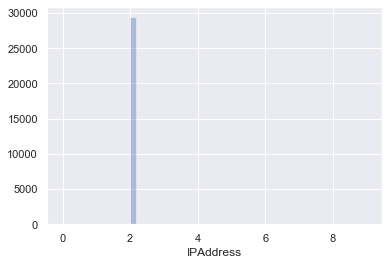

In [16]:
data=FINAL_DATASET['IPAddress']
sns.distplot(data, kde=False)

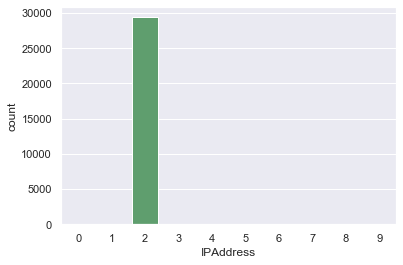

In [17]:
sns.countplot(data=FINAL_DATASET , x="IPAddress")

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=15)
model.fit(SCALED_DATASET)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
pred = model.fit_predict(SCALED_DATASET)

In [20]:
SCALED_DATASET = pd.DataFrame(SCALED_DATASET , columns=['IP', 'DATE','client'])

In [21]:
SCALED_DATASET['cluster'] = pred

In [22]:
ips = [dataset['IP'], FINAL_DATASET['IPAddress']]

In [23]:
fin_ip = pd.concat(ips , axis=1)

In [24]:
fin_ip

,IP,IPAddress
0,192.168.43.37,1
1,192.168.43.37,1
2,192.168.43.98,2
3,192.168.43.98,2
4,192.168.43.98,2
...,...,...
29444,46.105.14.53,4
29445,110.136.166.128,0
29446,110.136.166.128,0
29447,110.136.166.128,0


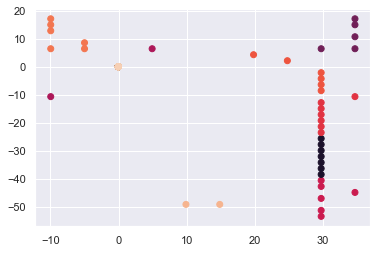

In [28]:
import matplotlib.pyplot as plt
plt.scatter(SCALED_DATASET['IP'], SCALED_DATASET['client'], c=SCALED_DATASET['cluster'])

In [52]:
import pandas as pd
data = pd.read_csv("mylogs.csv")
data

,IP,date,output
0,192.168.43.37,29/Jun/2020:15:59:09 +0530,GET /hack.html HTTP/1.1
1,192.168.43.37,29/Jun/2020:15:59:18 +0530,GET /favicon.ico HTTP/1.1
2,192.168.43.98,29/Jun/2020:16:02:52 +0530,403 3985
3,192.168.43.98,29/Jun/2020:16:02:52 +0530,403 3985
4,192.168.43.98,29/Jun/2020:16:02:52 +0530,403 3985
...,...,...,...
29444,46.105.14.53,17/May/2015:10:05:03 +0000,200 14872
29445,110.136.166.128,17/May/2015:10:05:06 +0000,GET /reset.css HTTP/1.1
29446,110.136.166.128,17/May/2015:10:05:03 +0000,GET /style2.css HTTP/1.1
29447,110.136.166.128,17/May/2015:10:05:41 +0000,GET /favicon.ico HTTP/1.1


In [60]:
count=data.groupby("IP").count()

In [99]:
count

,date,output
IP,,
110.136.166.128,5,5
192.168.43.37,2,2
192.168.43.98,29408,29408
24.236.252.67,1,1
46.105.14.53,1,1
50.16.19.13,1,1
66.249.73.135,1,1
66.249.73.185,1,1
83.149.9.216,23,23


In [65]:
count['output']

IP
110.136.166.128        5
192.168.43.37          2
192.168.43.98      29408
24.236.252.67          1
46.105.14.53           1
50.16.19.13            1
66.249.73.135          1
66.249.73.185          1
83.149.9.216          23
93.114.45.13           6
Name: output, dtype: int64

In [105]:
type(count)

pandas.core.frame.DataFrame

In [81]:
#we have got the total ips which attacked the webserver
#Now checking the maximum times the server was under attack by single ip
mylist=[]
def myanalysis(count):
    for x in count['output']:
        if x not in mylist and x>250:
            mylist.append(x)
            return x
occur=myanalysis(count)            

In [82]:
#As we can see from the above ip 192.168.43.98 attacked the server max times
occur abe jenkins to ye python wale code chala rha hai r

29408